## Importing of required libraries


In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as pt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import load_digits

## Loading of dataset

In [3]:
dt = pd.read_csv(r"C:\Users\Nafzy Flezy\Documents\DATA ANALYTICS\My_Data_Science_Journey\Data_Cleaning_Project\Muskets_teamData_V2.csv")
dt

C:\Users\Nafzy Flezy\AppData\Local\Temp\ipykernel_644\1529632721.py:1: DtypeWarning: Columns (26,29,76) have mixed types. Specify dtype option on import or set low_memory=False.
  dt = pd.read_csv(r"C:\Users\Nafzy Flezy\Documents\DATA ANALYTICS\My_Data_Science_Journey\Data_Cleaning_Project\Muskets_teamData_V2.csv")


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85.0,92.0,91.0,95.0,38.0,65.0,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,High,Low,5 ★,89.0,93.0,81.0,89.0,35.0,77.0,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87.0,92.0,78.0,90.0,52.0,90.0,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,...,High,High,4 ★,76.0,86.0,93.0,88.0,64.0,78.0,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91.0,85.0,86.0,94.0,36.0,59.0,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47.0,55.0,\n\n\n\nWuhan Zall,...,Medium,Medium,1 ★,64.0,28.0,26.0,38.0,48.0,51.0,NaN
19017,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47.0,67.0,\n\n\n\nOldham Athletic,...,Medium,Medium,1 ★,64.0,40.0,48.0,49.0,35.0,45.0,NaN
19018,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47.0,65.0,\n\n\n\nDerry City,...,Medium,Medium,1 ★,63.0,39.0,44.0,46.0,40.0,53.0,NaN
19019,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47.0,57.0,\n\n\n\nDalian YiFang FC,...,Medium,Medium,1 ★,58.0,49.0,41.0,49.0,30.0,44.0,NaN


## Checking of data Characteristics

In [4]:
dt.shape

(19021, 77)

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19021 entries, 0 to 19020
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19021 non-null  int64  
 1   Name              19021 non-null  object 
 2   LongName          19021 non-null  object 
 3   photoUrl          19021 non-null  object 
 4   playerUrl         19021 non-null  object 
 5   Nationality       19021 non-null  object 
 6   Age               19021 non-null  int64  
 7   ↓OVA              19019 non-null  float64
 8   POT               19020 non-null  float64
 9   Club              19021 non-null  object 
 10  Contract          19021 non-null  object 
 11  Positions         19021 non-null  object 
 12  Height            19021 non-null  object 
 13  Weight            19020 non-null  object 
 14  Preferred Foot    19021 non-null  object 
 15  BOV               19021 non-null  int64  
 16  Best Position     19021 non-null  object

## copying original dataset

In [6]:
df =dt.copy()
df

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85.0,92.0,91.0,95.0,38.0,65.0,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,High,Low,5 ★,89.0,93.0,81.0,89.0,35.0,77.0,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87.0,92.0,78.0,90.0,52.0,90.0,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,...,High,High,4 ★,76.0,86.0,93.0,88.0,64.0,78.0,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91.0,85.0,86.0,94.0,36.0,59.0,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47.0,55.0,\n\n\n\nWuhan Zall,...,Medium,Medium,1 ★,64.0,28.0,26.0,38.0,48.0,51.0,NaN
19017,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47.0,67.0,\n\n\n\nOldham Athletic,...,Medium,Medium,1 ★,64.0,40.0,48.0,49.0,35.0,45.0,NaN
19018,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47.0,65.0,\n\n\n\nDerry City,...,Medium,Medium,1 ★,63.0,39.0,44.0,46.0,40.0,53.0,NaN
19019,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47.0,57.0,\n\n\n\nDalian YiFang FC,...,Medium,Medium,1 ★,58.0,49.0,41.0,49.0,30.0,44.0,NaN


# DATA CLEANING

## Extracting player names

In [7]:
player_name = []
for url in df['playerUrl']:
    url_split = url.split('/')
    if len(url_split) >= 3:
        player1 = url_split[-3]
        player_split = player1.split('-')
        if len(player_split) >= 2:
            firstname = player_split[0]
            lastname = " ".join(player_split[1: ])
            player = firstname + ' ' + lastname
            player_name.append(player)

In [8]:
df.insert(1, 'PlayerName', player_name)

## Creating player's status to indicate nature of contract

In [9]:
df.Contract.unique()

array(['2004 ~ 2021', '2018 ~ 2022', '2014 ~ 2023', '2015 ~ 2023',
       '2017 ~ 2022', '2017 ~ 2023', '2018 ~ 2024', '2014 ~ 2022',
       '2018 ~ 2023', '2016 ~ 2023', '2013 ~ 2023', '2011 ~ 2023',
       '2009 ~ 2022', '2005 ~ 2021', '2011 ~ 2021', '2015 ~ 2022',
       '2017 ~ 2024', '2010 ~ 2024', '2012 ~ 2021', '2019 ~ 2024',
       '2015 ~ 2024', '2017 ~ 2025', '2020 ~ 2025', '2019 ~ 2023',
       '2008 ~ 2023', '2015 ~ 2021', '2020 ~ 2022', '2012 ~ 2022',
       '2016 ~ 2025', '2013 ~ 2022', '2011 ~ 2022', '2012 ~ 2024',
       '2016 ~ 2021', '2012 ~ 2023', '2008 ~ 2022', '2019 ~ 2022',
       '2017 ~ 2021', '2013 ~ 2024', '2020 ~ 2024', '2010 ~ 2022',
       '2020 ~ 2021', '2011 ~ 2024', '2020 ~ 2023', '2014 ~ 2024',
       '2013 ~ 2026', '2016 ~ 2022', '2010 ~ 2021', '2013 ~ 2021',
       '2019 ~ 2025', '2018 ~ 2025', '2016 ~ 2024', '2018 ~ 2021',
       '2009 ~ 2024', '2007 ~ 2022', 'Jun 30, 2021 On Loan',
       '2009 ~ 2021', '2019 ~ 2021', '2019 ~ 2026', 'Free', '2012 ~ 

In [10]:
player_status = []

for row in df.values:
    if 'On Loan' in row[11]:
        player_status.append('On Loan')
    elif 'Free' in row[11]:
        player_status.append('Free')
    else:
        player_status.append('Active')

In [11]:
set(player_status)

{'Active', 'Free', 'On Loan'}

In [12]:
df.insert(12, 'PlayerStatus', player_status)

In [13]:
c = df[['PlayerName','Contract', 'PlayerStatus']]
c.loc[c['PlayerStatus'] == 'On Loan']

,PlayerName,Contract,PlayerStatus
205,gareth bale,"Jun 30, 2021 On Loan",On Loan
248,alphonse areola,"Jun 30, 2021 On Loan",On Loan
254,danilo luis helio pereira,"Jun 30, 2021 On Loan",On Loan
302,matteo politano,"Jun 30, 2021 On Loan",On Loan
306,lucas torreira,"Jun 30, 2021 On Loan",On Loan
...,...,...,...
18514,moudi najjar,"Aug 31, 2021 On Loan",On Loan
18613,arthur read,"Jun 30, 2021 On Loan",On Loan
18642,yubiao deng,"Dec 31, 2020 On Loan",On Loan
18664,pu chen,"Dec 31, 2020 On Loan",On Loan


## Unpacking player's positions

In [14]:
df.Positions.unique()

array(['RW, ST, CF', 'ST, LW', 'GK', 'CAM, CM', 'LW, CAM', 'ST', 'RW',
       'ST, LW, RW', 'CB', 'LW', 'CDM', 'CF, ST', 'LW, RW', 'CDM, CM',
       'CDM, RB', 'CF, CAM', 'LW, ST', 'CM', 'ST, CF, LW', 'RM, LM, CAM',
       'RB', 'RW, CAM, CM', 'LB', 'LM, CF', 'CF', 'RW, LW', 'CAM, RM, RW',
       'CM, CDM', 'CAM, CF, ST', 'CM, CDM, CAM', 'CF, LW, CAM',
       'CAM, RM, CF', 'LM, ST', 'RM, LM, RW', 'LM', 'CAM, RW', 'CB, CDM',
       'RW, RM', 'LW, CF', 'CM, RM, LM', 'LB, LM', 'CAM, CM, RM',
       'CAM, CM, CF', 'CAM, CF', 'LM, RM, LW', 'LM, LB, CM', 'CM, LM, LB',
       'RM, RW', 'RM, CM', 'CAM, CM, LW', 'CB, LB', 'RM, RB', 'ST, RW',
       'LM, RW, LW', 'RB, LB', 'RB, RM', 'RM', 'LM, RM, CF', 'CAM, RM',
       'RB, RWB', 'CDM, CB, CM', 'CAM, RM, ST', 'LM, LW, RM', 'CM, CAM',
       'ST, RM, CF', 'LM, RM', 'RM, CF', 'LM, LWB', 'RW, RM, CF',
       'RB, CM', 'LW, CAM, RW', 'CAM, LW, CM', 'CM, CAM, CDM',
       'RW, LW, CAM', 'CM, CAM, LM', 'CM, RM, ST', 'CDM, CM, RB',
       'ST, CAM', 

In [15]:
pos1 = []
for pos in df['Positions']:
    p = pos.split(',')
    pos1.append(p)
    pos_split = pd.DataFrame(pos1)

In [16]:
pos_split

,0,1,2
0,RW,ST,CF
1,ST,LW,None
2,GK,None,None
3,CAM,CM,None
4,LW,CAM,None
...,...,...,...
19016,CB,None,None
19017,CM,None,None
19018,CM,None,None
19019,RW,None,None


In [17]:
def check_substring(row, substring):
    for col in row:
        if col and substring in col:
            return '1'
    return '0'

In [18]:
CAM = []
CB = []
CDM = []
CF = []
CM = []
GK = []
LB = []
LM = []
LW = []
LWB = []
RB = []
RM = []
RW = []
RWB = []
ST = []
CAM = pos_split.apply(check_substring, args=('CAM',), axis=1)
CB = pos_split.apply(check_substring, args=('CB',), axis=1)
CDM = pos_split.apply(check_substring, args=('CDM',), axis=1)
CF = pos_split.apply(check_substring, args=('CF',), axis=1)
CM = pos_split.apply(check_substring, args=('CM',), axis=1)
GK = pos_split.apply(check_substring, args=('GK',), axis=1)
LB = pos_split.apply(check_substring, args=('LB',), axis=1)
LM = pos_split.apply(check_substring, args=('LM',), axis=1)
LW = pos_split.apply(check_substring, args=('LW',), axis=1)
LWB = pos_split.apply(check_substring, args=('LWB',), axis=1)
RB = pos_split.apply(check_substring, args=('RB',), axis=1)
RM = pos_split.apply(check_substring, args=('RM',), axis=1)
RW = pos_split.apply(check_substring, args=('RW',), axis=1)
RWB = pos_split.apply(check_substring, args=('RWB',), axis=1)
ST = pos_split.apply(check_substring, args=('ST',), axis=1)

In [19]:
df.insert(14, 'CAM', CAM)
df.insert(15, 'CB', CB)
df.insert(16, 'CDM', CDM)
df.insert(17, 'CF', CF)
df.insert(18, 'CM', CM)
df.insert(19, 'GK', GK)
df.insert(20, 'LB', LB)
df.insert(21, 'LM', LM)
df.insert(22, 'LW', LW)
df.insert(23, 'LWB', LWB)
df.insert(24, 'RB', RB)
df.insert(25, 'RM', RM)
df.insert(26, 'RW', RW)
df.insert(27, 'RWB', RWB)
df.insert(28, 'ST', ST)

In [20]:
df[['Positions', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LB', 'LM', 'LW', 'LWB', 'RB', 'RM', 'RW', 'RWB', 'ST']]

,Positions,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,"RW, ST, CF",0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,"ST, LW",0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,GK,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,"CAM, CM",1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,"LW, CAM",1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,CB,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
19017,CM,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
19018,CM,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
19019,RW,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Converting the following columns to integer: IR, SM, and W/F

In [21]:
df[['IR', 'SM', 'W/F', 'Height', 'Weight']]

,IR,SM,W/F,Height,Weight
0,5 ★,4★,4 ★,170cm,72kg
1,5 ★,5★,4 ★,187cm,83kg
2,3 ★,1★,3 ★,188cm,87kg
3,4 ★,4★,5 ★,181cm,70kg
4,5 ★,5★,5 ★,175cm,68kg
...,...,...,...,...,...
19016,1 ★,2★,2 ★,178cm,66kg
19017,1 ★,2★,2 ★,175cm,65kg
19018,1 ★,2★,2 ★,179cm,74kg
19019,1 ★,2★,3 ★,175cm,69kg


In [22]:
starList = []
for x, y, z in zip(df['W/F'].values, df['SM'].values, df['IR'].values):
    starList.append([x[0],y[0],z[0]])
pd.DataFrame(starList, columns=['W/F', 'SM', 'IR'])

,W/F,SM,IR
0,4,4,5
1,4,5,5
2,3,1,3
3,5,4,4
4,5,5,5
...,...,...,...
19016,2,2,1
19017,2,2,1
19018,2,2,1
19019,3,2,1


In [23]:
stars = pd.DataFrame(starList, columns=['W/F1', 'SM1', 'IR1'])
df = df.join(stars) 
df

,ID,PlayerName,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,...,PAC,SHO,PAS,DRI,DEF,PHY,Hits,W/F1,SM1,IR1
0,158023,lionel messi,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,...,85.0,92.0,91.0,95.0,38.0,65.0,771,4,4,5
1,20801,c ronaldo dos santos aveiro,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,...,89.0,93.0,81.0,89.0,35.0,77.0,562,4,5,5
2,200389,jan oblak,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,...,87.0,92.0,78.0,90.0,52.0,90.0,150,3,1,3
3,192985,kevin de bruyne,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,...,76.0,86.0,93.0,88.0,64.0,78.0,207,5,4,4
4,190871,neymar da silva santos jr,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,...,91.0,85.0,86.0,94.0,36.0,59.0,595,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,247223,ao xia,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47.0,55.0,...,64.0,28.0,26.0,38.0,48.0,51.0,NaN,2,2,1
19017,258760,ben hough,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47.0,67.0,...,64.0,40.0,48.0,49.0,35.0,45.0,NaN,2,2,1
19018,252757,ronan mckinley,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47.0,65.0,...,63.0,39.0,44.0,46.0,40.0,53.0,NaN,2,2,1
19019,243790,zhenao wang,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47.0,57.0,...,58.0,49.0,41.0,49.0,30.0,44.0,NaN,3,2,1


In [24]:
df[['IR', 'IR1', 'SM', 'SM1', 'W/F', 'W/F1']]

,IR,IR1,SM,SM1,W/F,W/F1
0,5 ★,5,4★,4,4 ★,4
1,5 ★,5,5★,5,4 ★,4
2,3 ★,3,1★,1,3 ★,3
3,4 ★,4,4★,4,5 ★,5
4,5 ★,5,5★,5,5 ★,5
...,...,...,...,...,...,...
19016,1 ★,1,2★,2,2 ★,2
19017,1 ★,1,2★,2,2 ★,2
19018,1 ★,1,2★,2,2 ★,2
19019,1 ★,1,2★,2,3 ★,3


In [25]:
df['IR1'] = df['IR1'].astype('int64')
df['SM1'] = df['SM1'].astype('int64')
df['W/F1'] = df['W/F1'].astype('int64')

## Converting the Height and Weight columns to float

In [26]:
height2 = []

for val in df.Height.values:
    val = str(val)
    if 'cm' in val:
        cm = float(val[:-2])
        height2.append(cm)
    elif 'cm' not in val:
        feet = val[0]
        inch = val[-2]
        ft = float(feet)*30.48 + float(inch)*2.54
        height2.append(ft)
    else:
        height2.append(val)

In [27]:
df.insert(30, 'Height2', height2)

In [28]:
df.Weight.unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       nan, '58kg', '183lbs', '179lbs', '172lbs', '196lbs', '176lbs',
       '185lbs', '170lbs', '203lbs', '168lbs', '161lbs', '146lbs',
       '130lbs', '190lbs', '174lbs', '148lbs', '165lbs', '159lbs',
       '192lbs', '181lbs', '139lbs', '154lbs', '157lbs', '163lbs', '98kg',
       '103kg', '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg',
       '107kg', '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

In [29]:
weight2 = []

for val in df.Weight.values:
    val = str(val)
    if 'kg' in val:
        kg = float(val[:-2])
        weight2.append(kg)
    elif 'lbs' in val:
        lbs = val[:-3]
        kilo = float(lbs)* 0.45359237
        weight2.append(kilo)
    else:
        weight2.append(float(val))

In [30]:
df.insert(32, 'Weight2', weight2)

## Converting the value, wage and release clause columns to float

In [31]:
vList = []

for val in df.Value:
    if 'K' in val:
        val = float(val[1:-1])
        v1 = val * 1000
        vList.append(v1)
    elif 'M' in val:
        vl = float(val[1:-1])
        v2  = vl * 1000000
        vList.append(v2)
    else:
        val = float(0)
        vList.append(val)

In [32]:
df.insert(39, 'value2', vList)

In [33]:
wList = []

for val in df.Wage:
    if 'K' in val:
        val = float(val[1:-1])
        v1 = val * 1000
        wList.append(v1)
    else:
        val = float(val[1:])
        v2  = val * 1000
        wList.append(v2)

In [34]:
df.insert(41, 'wage2', wList)

In [35]:
df[['Wage', 'wage2']]

,Wage,wage2
0,€560K,560000.0
1,€220K,220000.0
2,€125K,125000.0
3,€370K,370000.0
4,€270K,270000.0
...,...,...
19016,€1K,1000.0
19017,€500,500000.0
19018,€500,500000.0
19019,€2K,2000.0


In [36]:
rList = []

for val in df['Release Clause']:
    val = str(val)
    if 'K' in val:
        val = float(val[1:-1])
        v1 = val * 1000
        rList.append(v1)
    elif 'M' in val:
        val = float(val[1:-1])
        v2  = val * 1000000
        rList.append(v2)
    else:
        rList.append(float(0))

In [37]:
df.insert(42, 'Release_clause', rList)

In [38]:
df[['Release Clause', 'Release_clause']]

,Release Clause,Release_clause
0,€138.4M,138400000.0
1,€75.9M,75900000.0
2,€159.4M,159400000.0
3,€161M,161000000.0
4,€166.5M,166500000.0
...,...,...
19016,€70K,70000.0
19017,€165K,165000.0
19018,€131K,131000.0
19019,€88K,88000.0


## Converting the Hits column to float

In [39]:
hList = []

for val in df.Hits:
    val = str(val)
    if 'K' in val:
        v1 = float(val[:-1]) * 1000
        hList.append(v1)
    elif val.isnumeric():
        hList.append(float(val))
    else:
        hList.append(float(0))

In [40]:
df.insert(99, 'Hits2', hList)

In [41]:
df[['Hits', 'Hits2']]

,Hits,Hits2
0,771,771.0
1,562,562.0
2,150,150.0
3,207,207.0
4,595,595.0
...,...,...
19016,NaN,0.0
19017,NaN,0.0
19018,NaN,0.0
19019,NaN,0.0


## Unpacking the weight and height columns into ranges with interval of 10

In [42]:
df.insert(31, 'HRange', height2)

In [43]:
Upperbands = []

count = 1

while count <= max(df['HRange'])/10:
    Upperbands.append(10*count)
    count+=1

In [44]:
Upperbands

[10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200]

In [45]:
df['HRange'] = pd.cut(x=df['HRange'], bins=Upperbands)

In [46]:
df[['Height', 'Height2', 'HRange']]

,Height,Height2,HRange
0,170cm,170.0,"(160, 170]"
1,187cm,187.0,"(180, 190]"
2,188cm,188.0,"(180, 190]"
3,181cm,181.0,"(180, 190]"
4,175cm,175.0,"(170, 180]"
...,...,...,...
19016,178cm,178.0,"(170, 180]"
19017,175cm,175.0,"(170, 180]"
19018,179cm,179.0,"(170, 180]"
19019,175cm,175.0,"(170, 180]"


In [47]:
df.insert(33, 'WRange', weight2)

In [48]:
UpperbandW = []

count = 1

while count <= max(df['WRange'])/10:
    UpperbandW.append(10*count)
    count+=1
UpperbandW

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]

In [49]:
df['WRange'] = pd.cut(x=df['WRange'], bins=UpperbandW)

In [50]:
df[['Weight', 'Weight2', 'WRange']]

,Weight,Weight2,WRange
0,72kg,72.0,"(70, 80]"
1,83kg,83.0,"(80, 90]"
2,87kg,87.0,"(80, 90]"
3,70kg,70.0,"(60, 70]"
4,68kg,68.0,"(60, 70]"
...,...,...,...
19016,66kg,66.0,"(60, 70]"
19017,65kg,65.0,"(60, 70]"
19018,74kg,74.0,"(70, 80]"
19019,69kg,69.0,"(60, 70]"


## Unpacking the wage column into ranges with interval of 50,000

In [51]:
df.insert(44, 'WageRange', wList)

In [52]:
interval_Wage = pd.interval_range(start=min(df['wage2']), end=max(df['wage2']), freq=50000)
interval_Wage                                                               

IntervalIndex([(0.0, 50000.0], (50000.0, 100000.0], (100000.0, 150000.0], (150000.0, 200000.0], (200000.0, 250000.0] ... (700000.0, 750000.0], (750000.0, 800000.0], (800000.0, 850000.0], (850000.0, 900000.0], (900000.0, 950000.0]], dtype='interval[float64, right]')

In [53]:
df['WageRange'] = pd.cut(x=df['WageRange'], bins=interval_Wage)

In [54]:
df[['Wage', 'wage2', 'WageRange']]

,Wage,wage2,WageRange
0,€560K,560000.0,"(550000.0, 600000.0]"
1,€220K,220000.0,"(200000.0, 250000.0]"
2,€125K,125000.0,"(100000.0, 150000.0]"
3,€370K,370000.0,"(350000.0, 400000.0]"
4,€270K,270000.0,"(250000.0, 300000.0]"
...,...,...,...
19016,€1K,1000.0,"(0.0, 50000.0]"
19017,€500,500000.0,"(450000.0, 500000.0]"
19018,€500,500000.0,"(450000.0, 500000.0]"
19019,€2K,2000.0,"(0.0, 50000.0]"


## Unpacking the value and release clause columns into ranges with interval of 50,000,000

In [55]:
df.insert(44, 'ValueRange', vList)

In [56]:
interval_value = pd.interval_range(start=min(df['value2']), end=max(df['value2']), freq=50000000)
interval_value

IntervalIndex([(0.0, 50000000.0], (50000000.0, 100000000.0], (100000000.0, 150000000.0]], dtype='interval[float64, right]')

In [57]:
df['ValueRange'] = pd.cut(x=df['ValueRange'], bins=interval_value)

In [58]:
df[['Value', 'value2', 'ValueRange']]

,Value,value2,ValueRange
0,€103.5M,103500000.0,"(100000000.0, 150000000.0]"
1,€63M,63000000.0,"(50000000.0, 100000000.0]"
2,€120M,120000000.0,"(100000000.0, 150000000.0]"
3,€129M,129000000.0,"(100000000.0, 150000000.0]"
4,€132M,132000000.0,"(100000000.0, 150000000.0]"
...,...,...,...
19016,€100K,100000.0,"(0.0, 50000000.0]"
19017,€130K,130000.0,"(0.0, 50000000.0]"
19018,€120K,120000.0,"(0.0, 50000000.0]"
19019,€100K,100000.0,"(0.0, 50000000.0]"


In [59]:
df.insert(47, 'ReleaseRange', rList)

In [60]:
interval_release = pd.interval_range(start=min(df['Release_clause']), end=max(df['Release_clause']),
                                     freq=50000000)
interval_release

IntervalIndex([(0.0, 50000000.0], (50000000.0, 100000000.0], (100000000.0, 150000000.0], (150000000.0, 200000000.0]], dtype='interval[float64, right]')

In [61]:
df['ReleaseRange'] = pd.cut(x=df['ReleaseRange'], bins=interval_release)

In [62]:
df[['Release Clause', 'Release_clause', 'ReleaseRange']]

,Release Clause,Release_clause,ReleaseRange
0,€138.4M,138400000.0,"(100000000.0, 150000000.0]"
1,€75.9M,75900000.0,"(50000000.0, 100000000.0]"
2,€159.4M,159400000.0,"(150000000.0, 200000000.0]"
3,€161M,161000000.0,"(150000000.0, 200000000.0]"
4,€166.5M,166500000.0,"(150000000.0, 200000000.0]"
...,...,...,...
19016,€70K,70000.0,"(0.0, 50000000.0]"
19017,€165K,165000.0,"(0.0, 50000000.0]"
19018,€131K,131000.0,"(0.0, 50000000.0]"
19019,€88K,88000.0,"(0.0, 50000000.0]"


### copying the df data

In [63]:
df_new = df.copy()
df_new

,ID,PlayerName,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,...,SHO,PAS,DRI,DEF,PHY,Hits,Hits2,W/F1,SM1,IR1
0,158023,lionel messi,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,...,92.0,91.0,95.0,38.0,65.0,771,771.0,4,4,5
1,20801,c ronaldo dos santos aveiro,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,...,93.0,81.0,89.0,35.0,77.0,562,562.0,4,5,5
2,200389,jan oblak,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,...,92.0,78.0,90.0,52.0,90.0,150,150.0,3,1,3
3,192985,kevin de bruyne,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,...,86.0,93.0,88.0,64.0,78.0,207,207.0,5,4,4
4,190871,neymar da silva santos jr,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,...,85.0,86.0,94.0,36.0,59.0,595,595.0,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,247223,ao xia,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47.0,55.0,...,28.0,26.0,38.0,48.0,51.0,NaN,0.0,2,2,1
19017,258760,ben hough,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47.0,67.0,...,40.0,48.0,49.0,35.0,45.0,NaN,0.0,2,2,1
19018,252757,ronan mckinley,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47.0,65.0,...,39.0,44.0,46.0,40.0,53.0,NaN,0.0,2,2,1
19019,243790,zhenao wang,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47.0,57.0,...,49.0,41.0,49.0,30.0,44.0,NaN,0.0,3,2,1


### Removing of irrelevant and redundant columns

In [64]:
list(df_new.columns)

['ID',
 'PlayerName',
 'Name',
 'LongName',
 'photoUrl',
 'playerUrl',
 'Nationality',
 'Age',
 '↓OVA',
 'POT',
 'Club',
 'Contract',
 'PlayerStatus',
 'Positions',
 'CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'GK',
 'LB',
 'LM',
 'LW',
 'LWB',
 'RB',
 'RM',
 'RW',
 'RWB',
 'ST',
 'Height',
 'Height2',
 'HRange',
 'Weight',
 'WRange',
 'Weight2',
 'Preferred Foot',
 'BOV',
 'Best Position',
 'Joined',
 'Loan Date End',
 'Value',
 'value2',
 'Wage',
 'wage2',
 'ValueRange',
 'WageRange',
 'Release_clause',
 'ReleaseRange',
 'Release Clause',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Mark

In [65]:
ref = [
 'Age',
 '↓OVA',
 'POT',
 'PlayerStatus',
 'CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'GK',
 'LB',
 'LM',
 'LW',
 'LWB',
 'RB',
 'RM',
 'RW',
 'RWB',
 'ST',
 'Height2',
 'Weight2',
 'Preferred Foot',
 'BOV',
 'Best Position',
 'value2',
 'Release_clause',
 'wage2',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'A/W',
 'D/W',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'W/F1',
 'SM1',
 'IR1',
'Hits2'
]

In [66]:
df2 = df_new[ref]
df2

,Age,↓OVA,POT,PlayerStatus,CAM,CB,CDM,CF,CM,GK,...,PAC,SHO,PAS,DRI,DEF,PHY,W/F1,SM1,IR1,Hits2
0,33,93.0,93.0,Active,0,0,0,1,0,0,...,85.0,92.0,91.0,95.0,38.0,65.0,4,4,5,771.0
1,35,92.0,92.0,Active,0,0,0,0,0,0,...,89.0,93.0,81.0,89.0,35.0,77.0,4,5,5,562.0
2,27,91.0,93.0,Active,0,0,0,0,0,1,...,87.0,92.0,78.0,90.0,52.0,90.0,3,1,3,150.0
3,29,91.0,91.0,Active,1,0,0,0,1,0,...,76.0,86.0,93.0,88.0,64.0,78.0,5,4,4,207.0
4,28,91.0,91.0,Active,1,0,0,0,0,0,...,91.0,85.0,86.0,94.0,36.0,59.0,5,5,5,595.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,21,47.0,55.0,Active,0,1,0,0,0,0,...,64.0,28.0,26.0,38.0,48.0,51.0,2,2,1,0.0
19017,17,47.0,67.0,Active,0,0,0,0,1,0,...,64.0,40.0,48.0,49.0,35.0,45.0,2,2,1,0.0
19018,18,47.0,65.0,Active,0,0,0,0,1,0,...,63.0,39.0,44.0,46.0,40.0,53.0,2,2,1,0.0
19019,20,47.0,57.0,Active,0,0,0,0,0,0,...,58.0,49.0,41.0,49.0,30.0,44.0,3,2,1,0.0


### Checking for null columns and filling with a value of 0

In [67]:
missCol = df2.isnull().sum()
colList = df2.columns.tolist()
NulList = []

for row, col in zip(missCol, colList):
    if row > int(0):
        Nil = col + ' = ' + str(row)
        NulList.append(Nil)
        #NulList.append(row)
NulList

['↓OVA = 2',
 'POT = 1',
 'Weight2 = 1',
 'Attacking = 1',
 'Crossing = 1',
 'Finishing = 5',
 'Heading Accuracy = 8',
 'Short Passing = 9',
 'Volleys = 7',
 'Skill = 6',
 'Dribbling = 1',
 'Curve = 8',
 'FK Accuracy = 6',
 'Long Passing = 3',
 'Ball Control = 3',
 'Movement = 5',
 'Acceleration = 4',
 'Sprint Speed = 3',
 'Agility = 2',
 'Reactions = 4',
 'Balance = 7',
 'Power = 1',
 'Shot Power = 2',
 'Jumping = 4',
 'Stamina = 1',
 'Strength = 5',
 'Long Shots = 7',
 'Mentality = 6',
 'Interceptions = 4',
 'Positioning = 1',
 'Penalties = 1',
 'Composure = 1',
 'Defending = 1',
 'Marking = 2',
 'Standing Tackle = 3',
 'Sliding Tackle = 1',
 'Goalkeeping = 3',
 'GK Diving = 1',
 'GK Handling = 1',
 'GK Kicking = 2',
 'GK Positioning = 2',
 'Total Stats = 1',
 'D/W = 1',
 'PAC = 3',
 'SHO = 3',
 'PAS = 5',
 'DRI = 2',
 'DEF = 5',
 'PHY = 1']

In [68]:
len(NulList)

49

In [69]:
df2.fillna(0, inplace=True)

C:\Users\Nafzy Flezy\AppData\Local\Temp\ipykernel_644\2993428024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.fillna(0, inplace=True)


### Checking for abnormalities in the unique values of each column

In [70]:
cat = df2.select_dtypes('object').columns
num = df2.select_dtypes(['float64', 'int64']).columns
print(num, cat)

Index(['Age', '↓OVA', 'POT', 'Height2', 'Weight2', 'BOV', 'value2',
       'Release_clause', 'wage2', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Volleys', 'Skill', 'Curve', 'FK Accuracy',
       'Long Passing', 'Ball Control', 'Movement', 'Acceleration',
       'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power',
       'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'W/F1', 'SM1',
       'IR1', 'Hits2'],
      dtype='object') Index(['PlayerStatus', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LB', 'LM', 'LW',
       'LWB', 'RB', 'RM', 'RW', 'RWB', 'ST', 'Preferred Foot', 'Best Position',
       'Short 

In [71]:
for col in cat:
    print(col, df2[col].unique())

PlayerStatus ['Active' 'On Loan' 'Free']
CAM ['0' '1']
CB ['0' '1']
CDM ['0' '1']
CF ['1' '0']
CM ['0' '1']
GK ['0' '1']
LB ['0' '1']
LM ['0' '1']
LW ['0' '1']
LWB ['0' '1']
RB ['0' '1']
RM ['0' '1']
RW ['1' '0']
RWB

 ['0' '1']
ST ['1' '0']
Preferred Foot ['Left' 'Right']
Best Position ['RW' 'ST' 'GK' 'CAM' 'LW' 'CB' 'CDM' 'CF' 'CM' 'RB' 'LB' 'LM' 'RM' 'LWB'
 'RWB']
Short Passing ['91' '82' '43' '94' '87' '84' '45' '83' '61' '79' '85' '33' '55' '86'
 '57' '81' '42' '74' '93' '88' '30' '65' '89' '77' '32' '50' '80' '78'
 '90' '69' '40' '92' '75' '73' '34' '76' '35' '70' '37' '23' '44' '38'
 '48' '26' '60' '25' '46' '28' '24' '36' '51' '17' '18' '39' '71' '67'
 '27' '72' '66' '20' '31' '68' '29' '11' '64' '62' 0 '41' '63' '19' '54'
 '16' '69_' '22' '49' '59' '14' '58' '15' '21' '52' '56' '53' '12' '47'
 '13' 58 65 70 67 66 57 72 37 26 60 64 55 56 59 68 21 74 42 63 62 47 22 52
 15 12 73 61 54 71 25 28 27 31 69 50 75 29 36 41 32 53 48 30 11 35 16 51
 18 43 19 34 33 23 38 20 13 39 49 24 46 17 8 14 45 44 40 76 7]
Dribbling ['96' '88' '12' '95' '85' '90' '27' '92' '21' '70' '91' '69' '13' '30'
 '87' '65' '79' '83' '23' '80' '18' '93' '77' '63' '76' '16' '59' '81'
 '11' '84' '10' '75' '78' '55' '15' '86' '

### Converting the Dribbling, Short Passing unpacked position columns to integer

In [72]:
df2 = df2.copy()
df2.loc[df2['D/W'] == 0, 'D/W'] = 'Medium'
df2.loc[df2['Dribbling'] == '70_', 'Dribbling'] = '70'
df2['Dribbling'] = df2['Dribbling'].astype('int64')
df2['Short Passing'] = df2['Short Passing'].replace(['69_'], ['69'])
df2['Short Passing'] = df2['Short Passing'].astype('int64')

In [73]:
Potential_pos = ['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LB', 'LM', 'LW', 'LWB', 'RB', 'RM', 'RW', 
                 'RWB', 'ST']

for item in Potential_pos:
    df2[item] = df2[item].astype('int64')

In [74]:
cat2 = df2.select_dtypes('object').columns
num2 = df2.select_dtypes(['float64', 'int64']).columns
print(num2, cat2)

Index(['Age', '↓OVA', 'POT', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LB', 'LM',
       'LW', 'LWB', 'RB', 'RM', 'RW', 'RWB', 'ST', 'Height2', 'Weight2', 'BOV',
       'value2', 'Release_clause', 'wage2', 'Attacking', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
       'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning',
       'Vision', 'Penalties', 'Composure', 'Defending', 'Marking',
       'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes',
       'Total Stats', 'Base Stats', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY',
       'W/F1', 'SM1', 'IR1', 'Hits2'],
      dtype='object') Index(['PlayerStatus', 'Preferred Foot', '

# DATA PREPROCESSING

### Converting Categorical Columns to Numerical Columns

In [75]:
Label = ['Preferred Foot','PlayerStatus', 'Best Position', 'A/W', 'D/W']
encoder = LabelEncoder()

for x in Label:
    df2[x] = encoder.fit_transform(df2[x])

In [76]:
df2

,Age,↓OVA,POT,PlayerStatus,CAM,CB,CDM,CF,CM,GK,...,PAC,SHO,PAS,DRI,DEF,PHY,W/F1,SM1,IR1,Hits2
0,33,93.0,93.0,0,0,0,0,1,0,0,...,85.0,92.0,91.0,95.0,38.0,65.0,4,4,5,771.0
1,35,92.0,92.0,0,0,0,0,0,0,0,...,89.0,93.0,81.0,89.0,35.0,77.0,4,5,5,562.0
2,27,91.0,93.0,0,0,0,0,0,0,1,...,87.0,92.0,78.0,90.0,52.0,90.0,3,1,3,150.0
3,29,91.0,91.0,0,1,0,0,0,1,0,...,76.0,86.0,93.0,88.0,64.0,78.0,5,4,4,207.0
4,28,91.0,91.0,0,1,0,0,0,0,0,...,91.0,85.0,86.0,94.0,36.0,59.0,5,5,5,595.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,21,47.0,55.0,0,0,1,0,0,0,0,...,64.0,28.0,26.0,38.0,48.0,51.0,2,2,1,0.0
19017,17,47.0,67.0,0,0,0,0,0,1,0,...,64.0,40.0,48.0,49.0,35.0,45.0,2,2,1,0.0
19018,18,47.0,65.0,0,0,0,0,0,1,0,...,63.0,39.0,44.0,46.0,40.0,53.0,2,2,1,0.0
19019,20,47.0,57.0,0,0,0,0,0,0,0,...,58.0,49.0,41.0,49.0,30.0,44.0,3,2,1,0.0


### Dropping of duplicated data

In [77]:
df2.drop_duplicates(inplace=True)

In [78]:
df2.shape

(18979, 82)

### Converting all columns to float

In [79]:
unit = df2.select_dtypes(['int32', 'int64']).columns
for i in unit:
    df2[i] = df2[i].astype('float64')

In [80]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18979 entries, 0 to 19020
Data columns (total 82 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               18979 non-null  float64
 1   ↓OVA              18979 non-null  float64
 2   POT               18979 non-null  float64
 3   PlayerStatus      18979 non-null  float64
 4   CAM               18979 non-null  float64
 5   CB                18979 non-null  float64
 6   CDM               18979 non-null  float64
 7   CF                18979 non-null  float64
 8   CM                18979 non-null  float64
 9   GK                18979 non-null  float64
 10  LB                18979 non-null  float64
 11  LM                18979 non-null  float64
 12  LW                18979 non-null  float64
 13  LWB               18979 non-null  float64
 14  RB                18979 non-null  float64
 15  RM                18979 non-null  float64
 16  RW                18979 non-null  float6

### Removal of Outliers

In [81]:
outliers = []
def detect_outliers_iqr(data):
    """
    This is function to remove outliers
    """
    data = np.array(data, dtype=np.float64)
    data = np.sort(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3 - q1
    lwr_bound = q1 - (1.5 * IQR)
    upr_bound = q3 + (1.5 * IQR)
    outliers_mask = (data < lwr_bound) | (data > upr_bound)
    outliers = data[outliers_mask]
    
    return outliers

<AxesSubplot: >

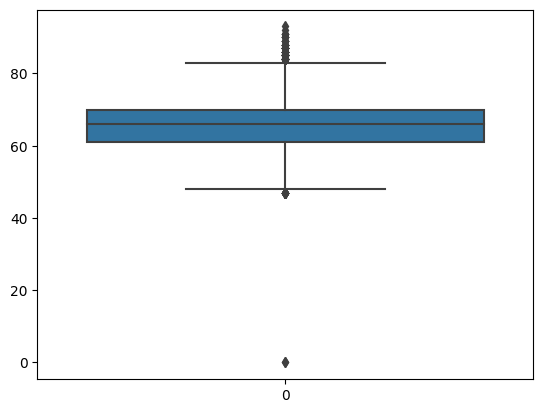

In [82]:
sn.boxplot(df2['↓OVA'])

In [83]:
sample_outliers = detect_outliers_iqr(df2['↓OVA'])
df2 = df2[~df2['↓OVA'].isin(sample_outliers)]
df2.shape

(18821, 82)

<AxesSubplot: >

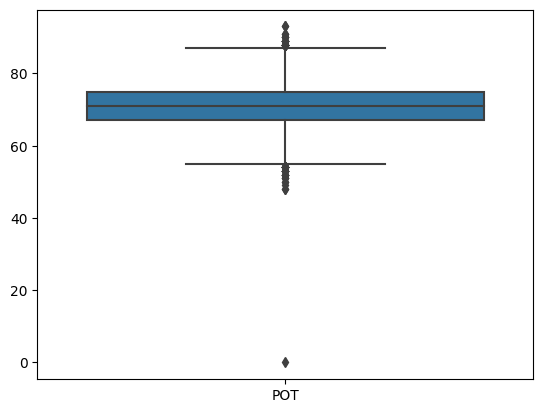

In [84]:
sn.boxplot(df2[['POT']])

In [85]:
sample_outliers = detect_outliers_iqr(df2['POT'])
df2 = df2[~df2['POT'].isin(sample_outliers)]
df2.shape

(18735, 82)

<AxesSubplot: >

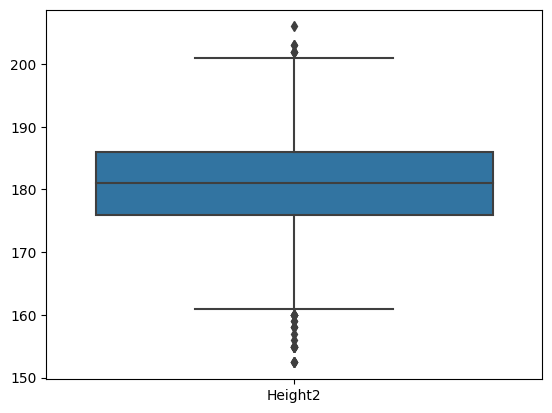

In [86]:
sn.boxplot(df2[['Height2']])

In [87]:
sample_outliers = detect_outliers_iqr(df2['Height2'])
df2 = df2[~df2['Height2'].isin(sample_outliers)]
df2.shape

(18703, 82)

<AxesSubplot: >

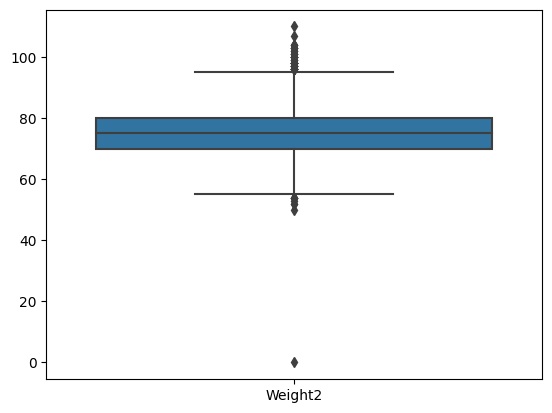

In [88]:
sn.boxplot(df2[['Weight2']])

In [89]:
sample_outliers = detect_outliers_iqr(df2['Weight2'])
df2 = df2[~df2['Weight2'].isin(sample_outliers)]
df2.shape

(18633, 82)

<AxesSubplot: >

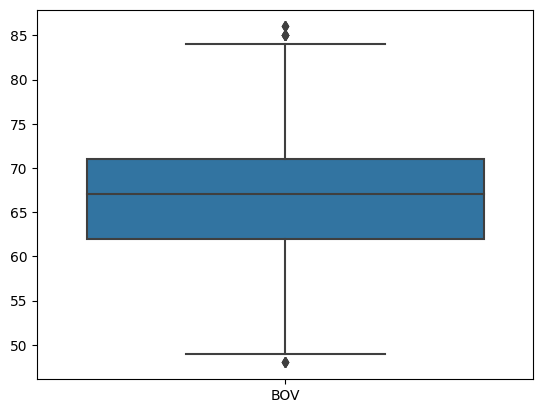

In [90]:
sn.boxplot(df2[['BOV']])

In [91]:
sample_outliers = detect_outliers_iqr(df2['BOV'])
df2 = df2[~df2['BOV'].isin(sample_outliers)]
df2.shape

(18619, 82)

<AxesSubplot: >

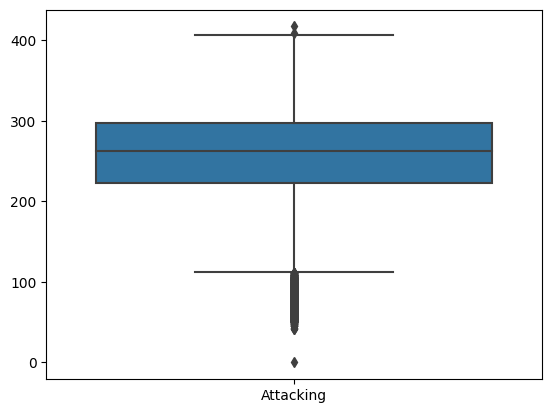

In [92]:
sn.boxplot(df2[['Attacking']])

In [93]:
sample_outliers = detect_outliers_iqr(df2['Attacking'])
df2 = df2[~df2['Attacking'].isin(sample_outliers)]
df2.shape

(16663, 82)

<AxesSubplot: >

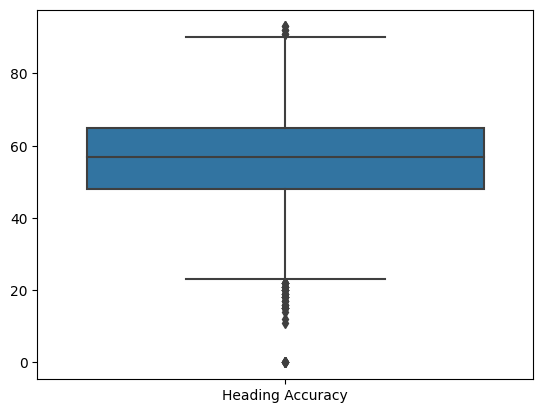

In [94]:
sn.boxplot(df2[['Heading Accuracy']])

I decided not to remove the outliers in Heading Accuracy because removing the ouliers resulted in very few data left (lesser than 2700)

<AxesSubplot: ylabel='Density'>

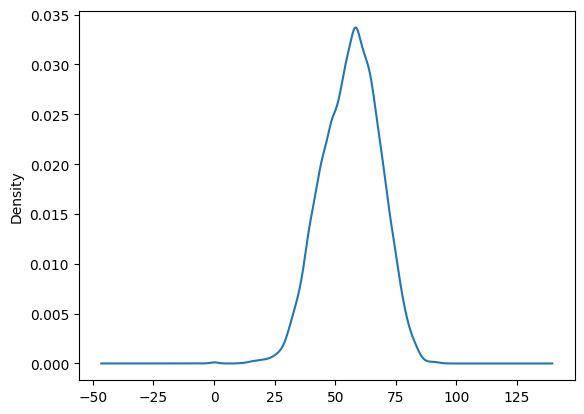

In [95]:
df2['Heading Accuracy'].plot(kind = 'density')

<AxesSubplot: >

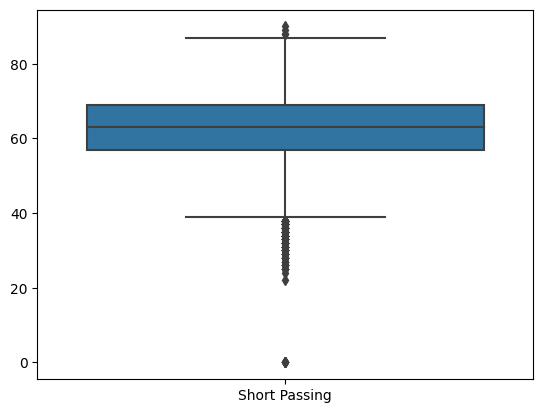

In [96]:
sn.boxplot(df2[['Short Passing']])

In [97]:
sample_outliers = detect_outliers_iqr(df2['Short Passing'])
df2 = df2[~df2['Short Passing'].isin(sample_outliers)]
df2.shape

(16367, 82)

<AxesSubplot: >

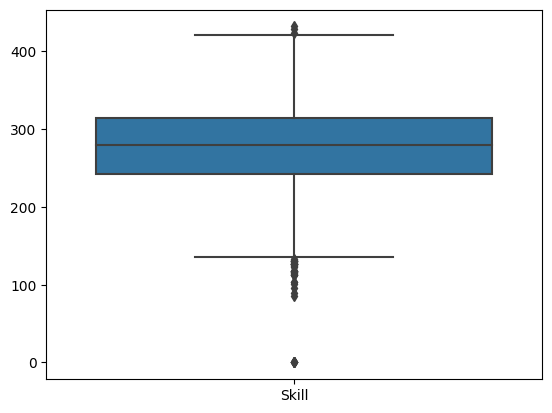

In [98]:
sn.boxplot(df2[['Skill']])

In [99]:
sample_outliers = detect_outliers_iqr(df2['Skill'])
df2 = df2[~df2['Skill'].isin(sample_outliers)]
df2.shape

(16324, 82)

<AxesSubplot: >

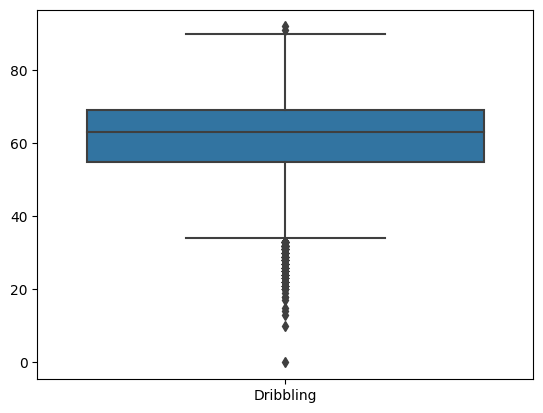

In [100]:
sn.boxplot(df2[['Dribbling']])

In [101]:
sample_outliers = detect_outliers_iqr(df2['Dribbling'])
df2 = df2[~df2['Dribbling'].isin(sample_outliers)]
df2.shape

(15818, 82)

<AxesSubplot: >

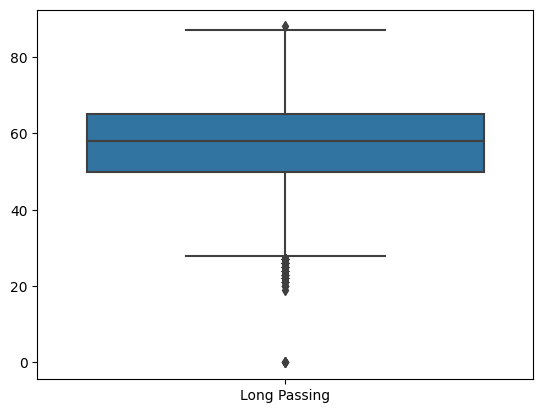

In [102]:
sn.boxplot(df2[['Long Passing']])

In [103]:
sample_outliers = detect_outliers_iqr(df2['Long Passing'])
df2 = df2[~df2['Long Passing'].isin(sample_outliers)]
df2.shape

(15680, 82)

<AxesSubplot: >

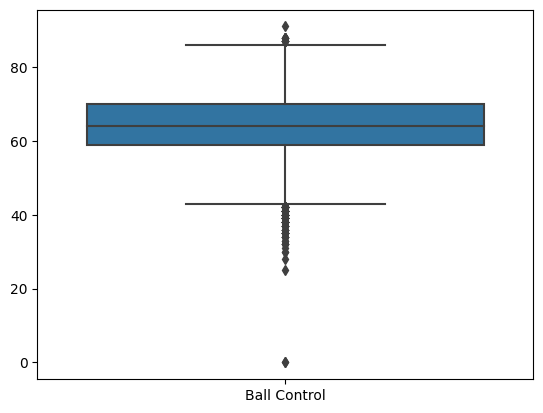

In [104]:
sn.boxplot(df2[['Ball Control']])

In [105]:
sample_outliers = detect_outliers_iqr(df2['Ball Control'])
df2 = df2[~df2['Ball Control'].isin(sample_outliers)]
df2.shape

(15503, 82)

<AxesSubplot: >

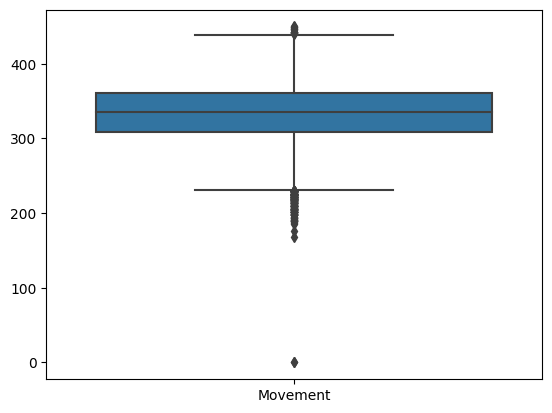

In [106]:
sn.boxplot(df2[['Movement']])

In [107]:
sample_outliers = detect_outliers_iqr(df2['Movement'])
df2 = df2[~df2['Movement'].isin(sample_outliers)]
df2.shape

(15267, 82)

<AxesSubplot: >

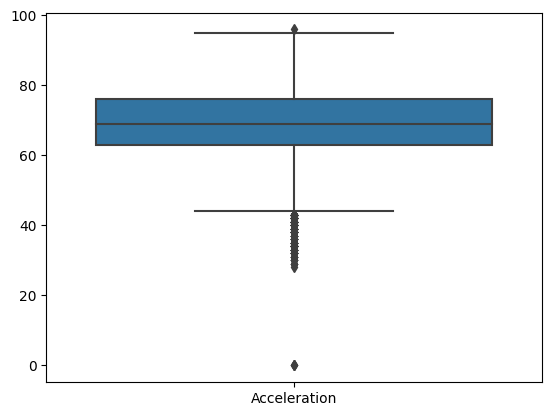

In [108]:
sn.boxplot(df2[['Acceleration']])

In [109]:
sample_outliers = detect_outliers_iqr(df2['Acceleration'])
df2 = df2[~df2['Acceleration'].isin(sample_outliers)]
df2.shape

(14987, 82)

<AxesSubplot: >

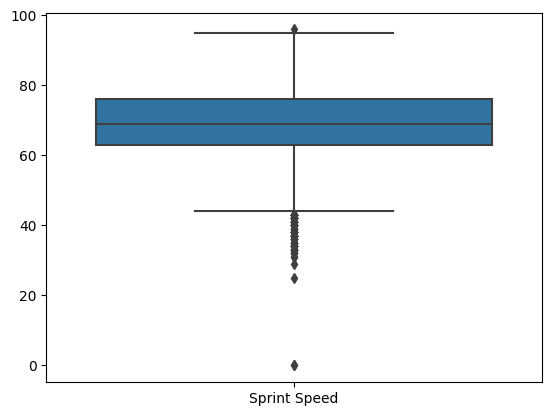

In [110]:
sn.boxplot(df2[['Sprint Speed']])

In [111]:
sample_outliers = detect_outliers_iqr(df2['Sprint Speed'])
df2 = df2[~df2['Sprint Speed'].isin(sample_outliers)]
df2.shape

(14830, 82)

<AxesSubplot: >

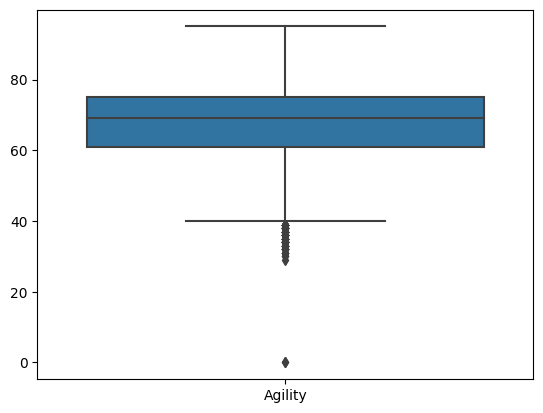

In [112]:
sn.boxplot(df2[['Agility']])

In [113]:
sample_outliers = detect_outliers_iqr(df2['Agility'])
df2 = df2[~df2['Agility'].isin(sample_outliers)]
df2.shape

(14701, 82)

<AxesSubplot: >

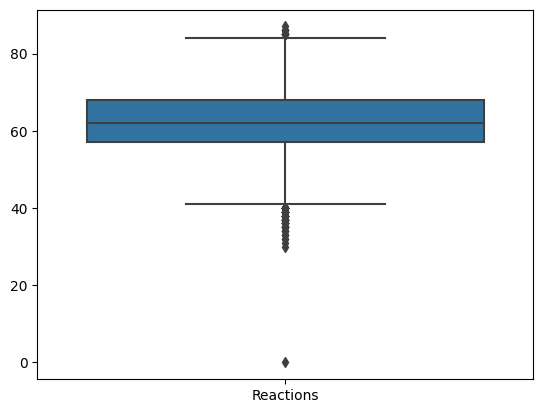

In [114]:
sn.boxplot(df2[['Reactions']])

In [115]:
sample_outliers = detect_outliers_iqr(df2['Reactions'])
df2 = df2[~df2['Reactions'].isin(sample_outliers)]
df2.shape

(14572, 82)

<AxesSubplot: >

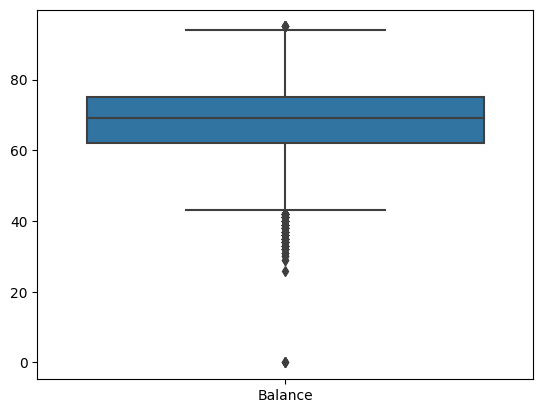

In [116]:
sn.boxplot(df2[['Balance']])

In [117]:
sample_outliers = detect_outliers_iqr(df2['Balance'])
df2 = df2[~df2['Balance'].isin(sample_outliers)]
df2.shape

(14279, 82)

<AxesSubplot: >

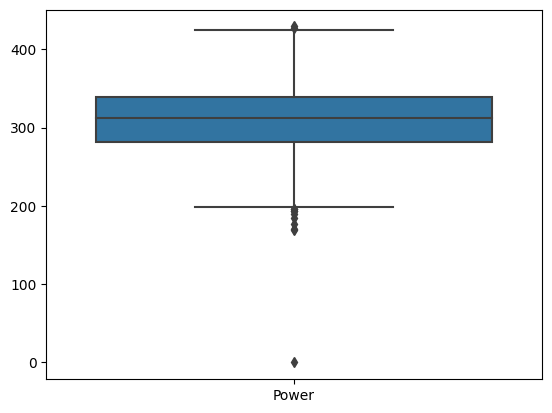

In [118]:
sn.boxplot(df2[['Power']])

In [119]:
sample_outliers = detect_outliers_iqr(df2['Power'])
df2 = df2[~df2['Power'].isin(sample_outliers)]
df2.shape

(14267, 82)

<AxesSubplot: >

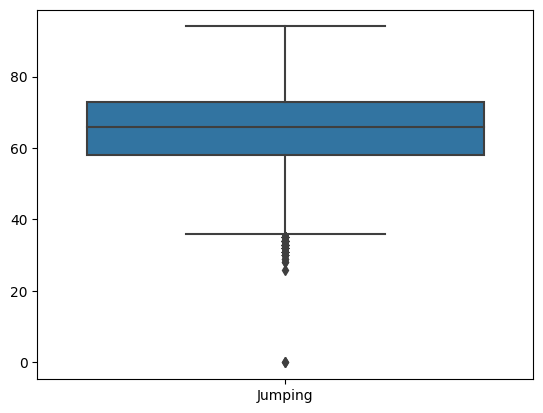

In [120]:
sn.boxplot(df2[['Jumping']])

In [121]:
sample_outliers = detect_outliers_iqr(df2['Jumping'])
df2 = df2[~df2['Jumping'].isin(sample_outliers)]
df2.shape

(14088, 82)

<AxesSubplot: >

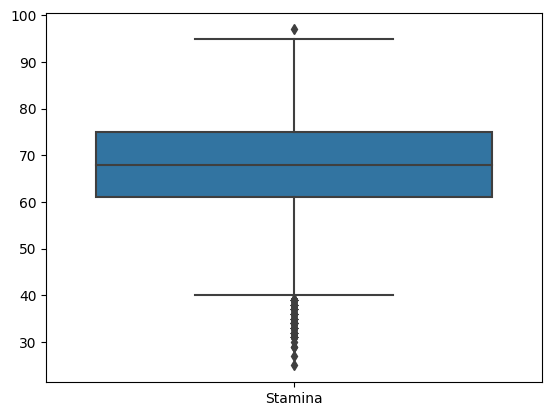

In [122]:
sn.boxplot(df2[['Stamina']])

In [123]:
sample_outliers = detect_outliers_iqr(df2['Stamina'])
df2 = df2[~df2['Stamina'].isin(sample_outliers)]
df2.shape

(13911, 82)

<AxesSubplot: >

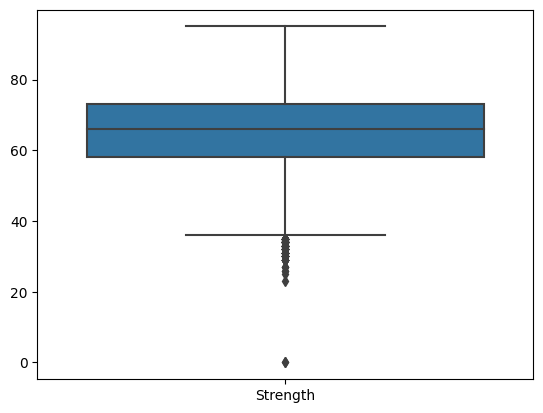

In [124]:
sn.boxplot(df2[['Strength']])

In [125]:
sample_outliers = detect_outliers_iqr(df2['Strength'])
df2 = df2[~df2['Strength'].isin(sample_outliers)]
df2.shape

(13639, 82)

<AxesSubplot: >

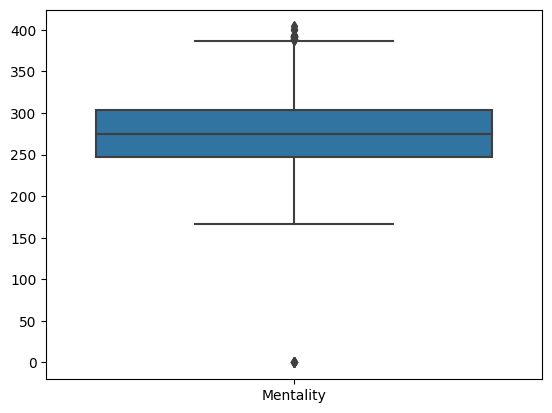

In [126]:
sn.boxplot(df2[['Mentality']])

In [127]:
sample_outliers = detect_outliers_iqr(df2['Mentality'])
df2 = df2[~df2['Mentality'].isin(sample_outliers)]
df2.shape

(13618, 82)

<AxesSubplot: >

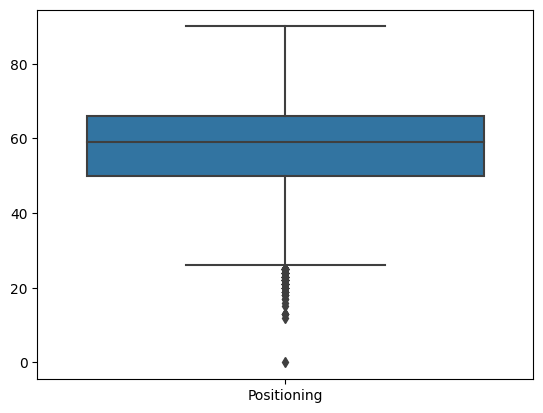

In [128]:
sn.boxplot(df2[['Positioning']])

In [129]:
sample_outliers = detect_outliers_iqr(df2['Positioning'])
df2 = df2[~df2['Positioning'].isin(sample_outliers)]
df2.shape

(13376, 82)

<AxesSubplot: >

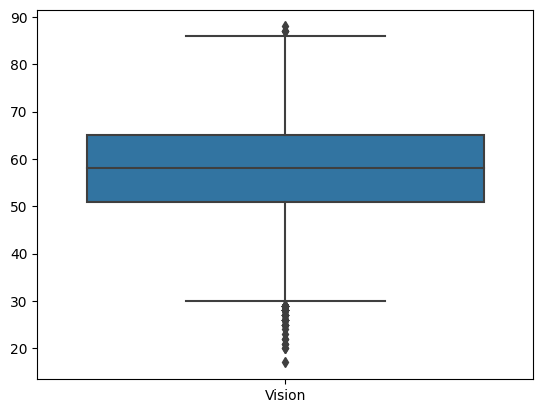

In [130]:
sn.boxplot(df2[['Vision']])

In [130]:
sample_outliers = detect_outliers_iqr(df2['Vision'])
df2 = df2[~df2['Vision'].isin(sample_outliers)]
df2.shape

(13303, 82)

<AxesSubplot: >

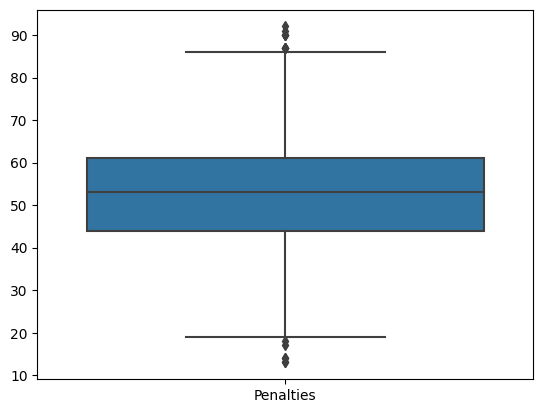

In [131]:
sn.boxplot(df2[['Penalties']])

In [131]:
sample_outliers = detect_outliers_iqr(df2['Penalties'])
df2 = df2[~df2['Penalties'].isin(sample_outliers)]
df2.shape

(13361, 82)

<AxesSubplot: >

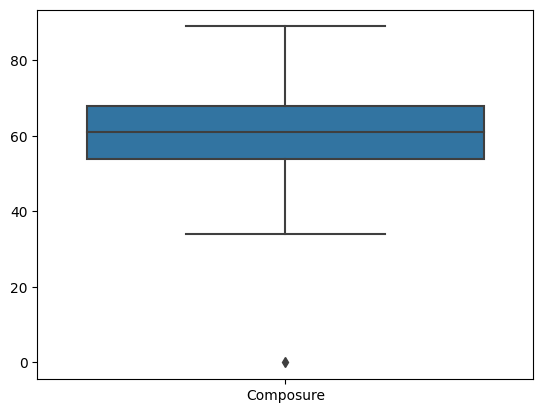

In [132]:
sn.boxplot(df2[['Composure']])

In [133]:
sample_outliers = detect_outliers_iqr(df2['Composure'])
df2 = df2[~df2['Composure'].isin(sample_outliers)]
df2.shape

(13360, 82)

Goal  keeping ability is not a general skill and small number of players will possess such ability. This will result in large number of outliers. This is why I decided not to remove outliers for all the goal keeping skill columns, that is, Goalkeeping, GK Diving, GK Handling, GK Kicking, GK Positioning, and GK Reflexes.

<AxesSubplot: >

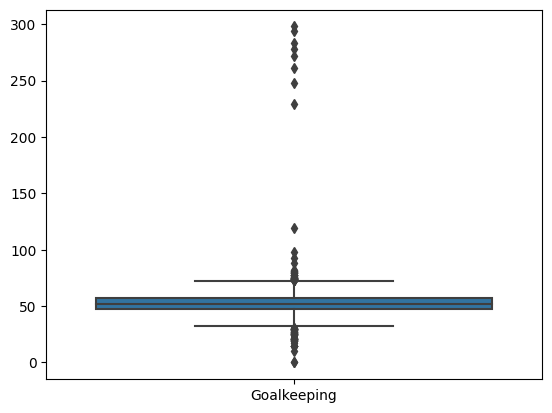

In [134]:
sn.boxplot(df2[['Goalkeeping']])

<AxesSubplot: >

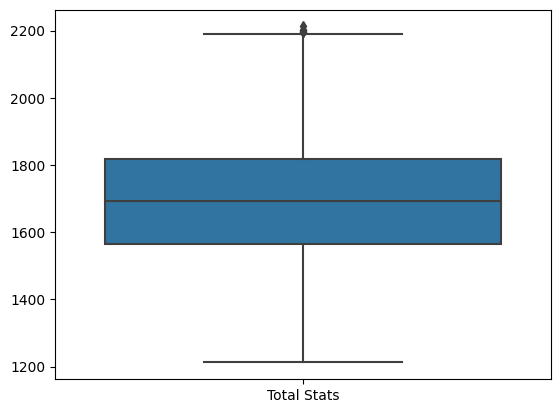

In [135]:
sn.boxplot(df2[['Total Stats']])

In [136]:
sample_outliers = detect_outliers_iqr(df2['Total Stats'])
df2 = df2[~df2['Total Stats'].isin(sample_outliers)]
df2.shape

(13354, 82)

<AxesSubplot: >

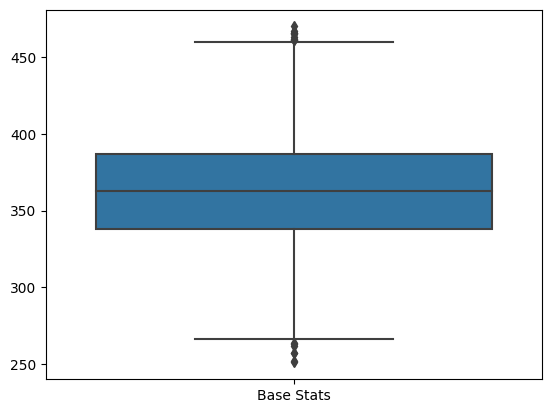

In [137]:
sn.boxplot(df2[['Base Stats']])

In [138]:
sample_outliers = detect_outliers_iqr(df2['Base Stats'])
df2 = df2[~df2['Base Stats'].isin(sample_outliers)]
df2.shape

(13338, 82)

<AxesSubplot: >

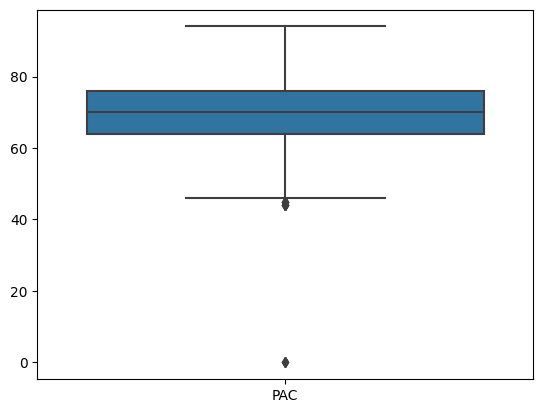

In [139]:
sn.boxplot(df2[['PAC']])

In [140]:
sample_outliers = detect_outliers_iqr(df2['PAC'])
df2 = df2[~df2['PAC'].isin(sample_outliers)]
df2.shape

(13327, 82)

<AxesSubplot: >

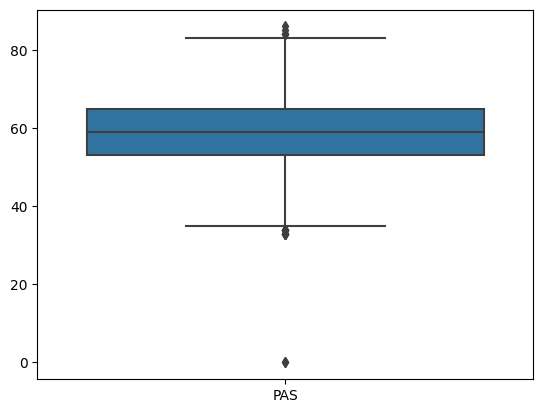

In [141]:
sn.boxplot(df2[['PAS']])

In [142]:
sample_outliers = detect_outliers_iqr(df2['PAS'])
df2 = df2[~df2['PAS'].isin(sample_outliers)]
df2.shape

(13310, 82)

<AxesSubplot: >

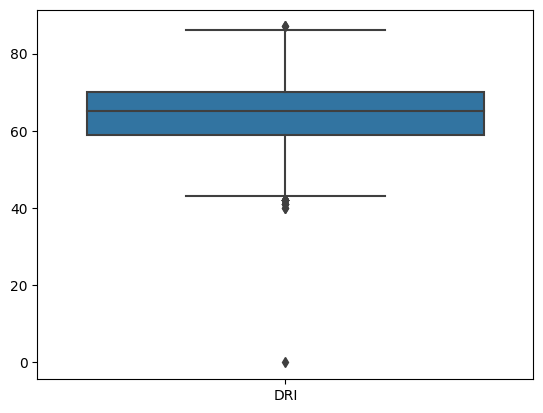

In [143]:
sn.boxplot(df2[['DRI']])

In [144]:
sample_outliers = detect_outliers_iqr(df2['DRI'])
df2 = df2[~df2['DRI'].isin(sample_outliers)]
df2.shape

(13288, 82)

<AxesSubplot: >

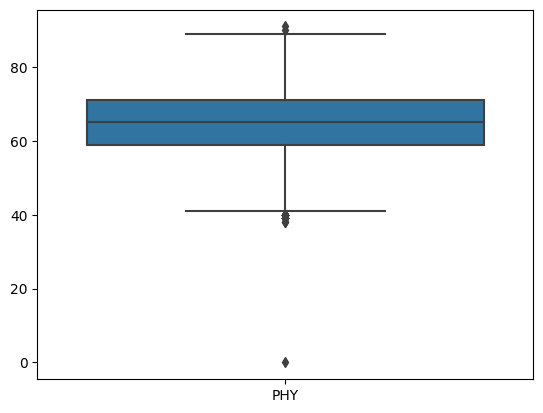

In [145]:
sn.boxplot(df2[['PHY']])

In [146]:
sample_outliers = detect_outliers_iqr(df2['PHY'])
df2 = df2[~df2['PHY'].isin(sample_outliers)]
df2.shape

(13257, 82)

In [147]:
df2.loc[df2['GK'] == 0.0]

,Age,↓OVA,POT,PlayerStatus,CAM,CB,CDM,CF,CM,GK,...,PAC,SHO,PAS,DRI,DEF,PHY,W/F1,SM1,IR1,Hits2
145,27.0,83.0,83.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,84.0,77.0,81.0,86.0,52.0,67.0,4.0,4.0,2.0,121.0
146,28.0,83.0,83.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.0,77.0,83.0,84.0,35.0,72.0,4.0,4.0,1.0,51.0
157,27.0,83.0,85.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,77.0,47.0,63.0,67.0,82.0,83.0,4.0,3.0,2.0,270.0
167,26.0,83.0,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,86.0,65.0,79.0,83.0,77.0,70.0,3.0,4.0,2.0,143.0
169,27.0,83.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,81.0,64.0,79.0,83.0,76.0,67.0,3.0,4.0,2.0,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19000,18.0,48.0,68.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,65.0,43.0,47.0,50.0,39.0,49.0,3.0,2.0,1.0,0.0
19001,19.0,48.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,66.0,48.0,37.0,47.0,17.0,53.0,3.0,2.0,1.0,0.0
19002,19.0,48.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,62.0,39.0,43.0,50.0,26.0,46.0,2.0,2.0,1.0,0.0
19003,19.0,48.0,65.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,61.0,34.0,50.0,51.0,43.0,48.0,3.0,2.0,1.0,0.0


## Checking the characteristics of the clean data

In [149]:
df2.describe().T.head(52)

,count,mean,std,min,25%,50%,75%,max
Age,13257.0,2.500566e+01,4.357190e+00,16.0,22.0,25.0,28.0,40.0
↓OVA,13257.0,6.617462e+01,6.233117e+00,48.0,62.0,66.0,70.0,83.0
POT,13257.0,7.146104e+01,5.762670e+00,55.0,67.0,71.0,75.0,87.0
PlayerStatus,13257.0,1.297428e-01,4.800519e-01,0.0,0.0,0.0,0.0,2.0
CAM,13257.0,1.413593e-01,3.484049e-01,0.0,0.0,0.0,0.0,1.0
CB,13257.0,1.552387e-01,3.621458e-01,0.0,0.0,0.0,0.0,1.0
CDM,13257.0,1.818662e-01,3.857488e-01,0.0,0.0,0.0,0.0,1.0
CF,13257.0,2.240326e-02,1.479966e-01,0.0,0.0,0.0,0.0,1.0
CM,13257.0,2.622011e-01,4.398480e-01,0.0,0.0,0.0,1.0,1.0
LB,13257.0,1.350230e-01,3.417610e-01,0.0,0.0,0.0,0.0,1.0


In [150]:
df2.describe().T.tail(52)

,count,mean,std,min,25%,50%,75%,max
Heading Accuracy,13257.0,56.015690,11.104828,0.0,48.0,56.0,64.0,93.0
Short Passing,13257.0,63.850720,7.888851,39.0,59.0,64.0,69.0,86.0
Volleys,13257.0,48.055141,13.611657,0.0,38.0,48.0,58.0,85.0
Skill,13257.0,286.128988,45.321934,164.0,253.0,285.0,318.0,421.0
Dribbling,13257.0,63.154937,9.189621,34.0,58.0,64.0,70.0,88.0
Curve,13257.0,53.281964,13.406609,0.0,43.0,54.0,64.0,90.0
FK Accuracy,13257.0,47.413140,14.039367,0.0,36.0,45.0,58.0,91.0
Long Passing,13257.0,57.425285,10.824749,28.0,51.0,59.0,65.0,85.0
Ball Control,13257.0,64.825451,7.634353,43.0,60.0,65.0,70.0,86.0
Movement,13257.0,339.493023,33.542256,238.0,316.0,339.0,362.0,439.0


## Rescaling the columns that have large scaling differences

In [151]:
dfArr = df2.values
X = dfArr[:,:-1]
Y = dfArr[:,-1]

In [152]:
scaler = Normalizer().fit(X)
Norm_X2 = scaler.transform(X)
Norm_X2

array([[4.50684920e-07, 1.38543883e-06, 1.38543883e-06, ...,
        6.67681363e-08, 6.67681363e-08, 3.33840682e-08],
       [4.55865722e-07, 1.35131625e-06, 1.35131625e-06, ...,
        6.51236745e-08, 6.51236745e-08, 1.62809186e-08],
       [3.84619227e-07, 1.18234800e-06, 1.21083831e-06, ...,
        5.69806263e-08, 4.27354697e-08, 2.84903131e-08],
       ...,
       [2.06710983e-05, 5.22217219e-05, 7.07169151e-05, ...,
        2.17590508e-06, 2.17590508e-06, 1.08795254e-06],
       [9.81019650e-05, 2.47836543e-04, 3.35611986e-04, ...,
        1.54897839e-05, 1.03265226e-05, 5.16326132e-06],
       [3.10517223e-05, 8.76754511e-05, 1.26033461e-04, ...,
        3.65314380e-06, 3.65314380e-06, 1.82657190e-06]])

In [154]:
df2_norm2 = pd.DataFrame(Norm_X2, columns = ['Age', '↓OVA', 'POT', 'PlayerStatus', 'CAM', 'CB', 'CDM', 'CF', 'CM',
       'LB', 'LM', 'LW', 'LWB', 'RB', 'RM', 'RW', 'RWB', 'ST', 'Height2',
       'Weight2', 'Preferred Foot', 'BOV', 'Best Position', 'value2',
       'Release_clause', 'wage2', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'A/W', 'D/W', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY',
       'W/F1', 'SM1', 'IR1'])

df2_norm2['Hits2'] = Y
df2_norm2

,Age,↓OVA,POT,PlayerStatus,CAM,CB,CDM,CF,CM,LB,...,PAC,SHO,PAS,DRI,DEF,PHY,W/F1,SM1,IR1,Hits2
0,4.506849e-07,0.000001,0.000001,0.0,0.000000e+00,0.000000e+00,0.0,1.669203e-08,0.000000,0.000000e+00,...,0.000001,1.285287e-06,1.352055e-06,1.435515e-06,8.679858e-07,0.000001,6.676814e-08,6.676814e-08,3.338407e-08,121.0
1,4.558657e-07,0.000001,0.000001,0.0,1.628092e-08,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000e+00,...,0.000001,1.253631e-06,1.351316e-06,1.367597e-06,5.698322e-07,0.000001,6.512367e-08,6.512367e-08,1.628092e-08,51.0
2,3.846192e-07,0.000001,0.000001,0.0,0.000000e+00,1.424516e-08,0.0,0.000000e+00,0.000000,0.000000e+00,...,0.000001,6.695224e-07,8.974449e-07,9.544255e-07,1.168103e-06,0.000001,5.698063e-08,4.273547e-08,2.849031e-08,270.0
3,3.753762e-07,0.000001,0.000001,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000e+00,...,0.000001,9.384406e-07,1.140566e-06,1.198316e-06,1.111691e-06,0.000001,4.331264e-08,5.775019e-08,2.887510e-08,143.0
4,4.348723e-07,0.000001,0.000001,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,1.610638e-08,...,0.000001,1.030808e-06,1.272404e-06,1.336830e-06,1.224085e-06,0.000001,4.831915e-08,6.442553e-08,3.221276e-08,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13252,2.176226e-05,0.000058,0.000082,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000001,0.000000e+00,...,0.000079,5.198762e-05,5.682368e-05,6.045073e-05,4.715157e-05,0.000059,3.627044e-06,2.418029e-06,1.209015e-06,0.0
13253,1.053088e-04,0.000266,0.000349,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000e+00,...,0.000366,2.660432e-04,2.050750e-04,2.605007e-04,9.422364e-05,0.000294,1.662770e-05,1.108513e-05,5.542567e-06,0.0
13254,2.067110e-05,0.000052,0.000071,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000e+00,...,0.000067,4.243015e-05,4.678196e-05,5.439763e-05,2.828677e-05,0.000050,2.175905e-06,2.175905e-06,1.087953e-06,0.0
13255,9.810197e-05,0.000248,0.000336,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000005,0.000000e+00,...,0.000315,1.755509e-04,2.581631e-04,2.633263e-04,2.220202e-04,0.000248,1.548978e-05,1.032652e-05,5.163261e-06,0.0


In [156]:
df2_norm2.describe().T.head(41)

,count,mean,std,min,25%,50%,75%,max
Age,13257.0,1.994087e-04,0.001640,3.175081e-07,6.116304e-06,1.413364e-05,2.585198e-05,0.023546
↓OVA,13257.0,4.719280e-04,0.003814,1.087373e-06,1.728824e-05,3.870050e-05,6.577106e-05,0.040095
POT,13257.0,4.847987e-04,0.003890,1.140416e-06,1.857139e-05,4.169260e-05,7.333188e-05,0.044477
PlayerStatus,13257.0,6.258754e-06,0.000056,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000613
CAM,13257.0,1.036313e-06,0.000022,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000593
CB,13257.0,1.090658e-06,0.000022,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000582
CDM,13257.0,1.531207e-06,0.000026,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000582
CF,13257.0,2.813724e-07,0.000012,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000592
CM,13257.0,1.712477e-06,0.000027,0.000000e+00,0.000000e+00,0.000000e+00,4.999934e-08,0.000571
LB,13257.0,1.033061e-06,0.000022,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000592


In [157]:
df2_norm2.describe().T.tail(42)

,count,mean,std,min,25%,50%,75%,max
Acceleration,13257.0,0.000490,0.003963,1.025408e-06,1.765327e-05,4.084888e-05,0.000073,0.050581
Sprint Speed,13257.0,0.000487,0.003934,1.029989e-06,1.758770e-05,4.091708e-05,0.000073,0.048256
Agility,13257.0,0.000477,0.003850,9.256812e-07,1.732272e-05,3.998060e-05,0.000071,0.046607
Reactions,13257.0,0.000446,0.003617,1.034330e-06,1.630287e-05,3.579343e-05,0.000061,0.038808
Balance,13257.0,0.000474,0.003824,7.834836e-07,1.707485e-05,3.976970e-05,0.000072,0.049814
Power,13257.0,0.002212,0.017856,4.826875e-06,8.040652e-05,1.816779e-04,0.000316,0.194188
Shot Power,13257.0,0.000426,0.003494,8.134928e-07,1.548300e-05,3.428287e-05,0.000060,0.042462
Jumping,13257.0,0.000456,0.003697,7.225579e-07,1.629618e-05,3.807496e-05,0.000069,0.048544
Stamina,13257.0,0.000491,0.003983,1.007809e-06,1.739284e-05,3.927308e-05,0.000069,0.048812
Strength,13257.0,0.000453,0.003683,8.088994e-07,1.621366e-05,3.741993e-05,0.000067,0.045281


# Feature Selection

In [158]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def autofeat1(data, t_size, seed):
    """
    This is a function to select best features for training model
    """
    
    def num_of_feat(data):
        """
        This function that changes number of features specified
        """
        features = []
        for i in range(1, len(data.columns) - 1):
            features.append(i)
        return features
    
    def feaSelector(X, Y, numFeature):
        """
        This is a function that determines feature ranks
        """
        model = LogisticRegression()
        rfe = RFE(model, n_features_to_select=numFeature)
        fit = rfe.fit(X, Y)
        return(list(fit.ranking_))
    
    def feature_selector(data, rankList):
        """
        This is a function that determines featuures to be selected
        """
        cols = data.columns
        cols = list(cols)[0:len(cols)-1]
        selCols = []
        for col, rank in zip(cols,rankList):
            if rank == 1:
                selCols.append(col)
        x = data[selCols].values
        return x
    
    def column_selector(data, rankList):
        """
        This function returns the selected columns
        """
        cols = data.columns
        cols = list(cols)[0:len(cols)-1]
        selCols = []
        for col, rank in zip(cols,rankList):
            if rank == 1:
                selCols.append(col)
        return selCols
    
    def modeller(X, Y, numFeature, seed, t_size):
        """
        This determines the score of the different numbers of features 
        """
        selectedCols = feaSelector(X, Y, numFeature)
        x = feature_selector(data, selectedCols)
        test_size = t_size
        seed = seed
        xTrain, xTest, yTrain, yTest = train_test_split(x, Y, test_size = t_size, random_state=seed)
        model = LogisticRegression()
        model.fit(xTrain, yTrain)
        modelScore = model.score(xTest, yTest)
        return modelScore
    
    X = data.values[:,:-1]
    Y = data.values[:,-1]
    
    numFeature = num_of_feat(data)
    score_dic = {i: modeller(X, Y, int(i), seed, t_size) for i in numFeature}
    max_score = max(score_dic.values())
    max_key = [key for key, value in score_dic.items() if value == max_score][0]
    max_rank = feaSelector(X, Y, max_key)
    cols = column_selector(df2, max_rank)
    
    return max_key, max_score, cols

In [159]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def autofeat2(data, t_size, seed):
    """
    This is a function to select best features for training model
    """
    def get_feature_indices(data):
        """
        This function that changes number of features specified
        """
        return list(range(1, len(data.columns) - 1))
    
    def feaSelector(X, Y, numFeature):
        """
        This is a function that determines feature ranks
        """
        model = LogisticRegression()
        rfe = RFE(model, n_features_to_select=numFeature)
        fit = rfe.fit(X, Y)
        return(list(fit.ranking_))
    
    def feature_selector(data, rankList):
        """
        This is a function that determines featuures to be selected
        """
        selected_columns = [col for col, rank in zip(data.columns[:-1], rankList) if rank == 1]
        selected_data = data[selected_columns].values
        return selected_data
    
    def column_selector(data, rankList):
        """
        This is a function that determines featuures to be selected
        """
        selected_columns = [col for col, rank in zip(data.columns[:-1], rankList) if rank == 1]
        return selected_columns
    
    def modeller(X, Y, num_feature, seed, test_size):
        """
        This determines the score of the different numbers of features 
        """
        selected_cols = feaSelector(X, Y, num_feature)
        selected_data = feature_selector(data, selected_cols)
        x_train, x_test, y_train, y_test = train_test_split(selected_data, Y, test_size=test_size, random_state=seed)
        model = LogisticRegression()
        model.fit(x_train, y_train)
        model_score = model.score(x_test, y_test)
        return model_score
    
    X = data.values[:, :-1]
    Y = data.values[:, -1]
    
    num_features = get_feature_indices(data)
    score_dict = {i: modeller(X, Y, int(i), seed, t_size) for i in num_features}
    max_score = max(score_dict.values())
    max_key = [key for key, value in score_dict.items() if value == max_score][0]
    max_rank = feaSelector(X, Y, max_key)
    cols = column_selector(df2, max_rank)
    
    
    return max_key, max_score, cols

In [ ]:
autofeat1(df2_norm2, 0.2, 10)

: 